In [20]:
import os
import re

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
# Specify the path to the folder containing the data (relative)
path = os.path.join("..", "data", "crawler")

# File containing glassdoor's reviews
reviews_fpath = os.path.join(path, "reviews.csv")

# File containing glassdoor companies
companies_fpath = os.path.join(path, "companies.json")

In [22]:
# Load the reviews CSV file into a Pandas DataFrame object
reviews = pd.read_csv(reviews_fpath)
reviews.dropna(subset="summary", inplace=True)

In [23]:
# Load the companies CSV file into a Pandas DataFrame object
companies = pd.read_json(companies_fpath)

## 1. Getting Familiar With the Data

In [24]:
reviews.shape

(8953542, 26)

In [25]:
reviews.columns

Index(['_id', 'reviewDateTime', 'ratingOverall', 'ratingCeo',
       'ratingBusinessOutlook', 'ratingWorkLifeBalance',
       'ratingCultureAndValues', 'ratingDiversityAndInclusion',
       'ratingSeniorLeadership', 'ratingRecommendToFriend',
       'ratingCareerOpportunities', 'ratingCompensationAndBenefits',
       'isCurrentJob', 'lengthOfEmployment', 'employmentStatus',
       'jobEndingYear', 'jobTitle', 'location', 'pros', 'cons', 'summary',
       'advice', 'countHelpful', 'featured', 'isCovid19', 'company_id'],
      dtype='object')

In [26]:
def camel_to_snake(s):
    temp = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', s)
    temp = re.sub('([a-z0-9])([A-Z])', r'\1_\2', temp).lower()

    return temp

In [27]:
new_columns = [camel_to_snake(col) for col in reviews.columns]
new_columns[0] = "id" # Manually remove the redauntant underscore from `_id`

reviews.columns = new_columns

In [28]:
reviews.head(5).T

,0,1,2,3,4
id,76539314,77761132,70647636,76603379,71206475
review_date_time,2023-05-17T19:46:58.027,2023-06-27T10:58:42.507,2022-10-31T09:19:32.203,2023-05-19T14:34:36.497,2022-11-18T09:57:45.897
rating_overall,5,3,2,3,5
rating_ceo,NaN,NaN,NO_OPINION,APPROVE,APPROVE
rating_business_outlook,NaN,NEGATIVE,NEGATIVE,NEGATIVE,POSITIVE
rating_work_life_balance,0,2,5,2,4
rating_culture_and_values,0,2,2,2,5
rating_diversity_and_inclusion,0,3,5,2,5
rating_senior_leadership,0,1,1,2,5
rating_recommend_to_friend,NaN,NEGATIVE,NaN,NEGATIVE,POSITIVE


## 2. Data Preprocessing

### 2.1. Type Casting

In [29]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953542 entries, 0 to 8985774
Data columns (total 26 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   id                                int64  
 1   review_date_time                  object 
 2   rating_overall                    int64  
 3   rating_ceo                        object 
 4   rating_business_outlook           object 
 5   rating_work_life_balance          int64  
 6   rating_culture_and_values         int64  
 7   rating_diversity_and_inclusion    int64  
 8   rating_senior_leadership          int64  
 9   rating_recommend_to_friend        object 
 10  rating_career_opportunities       int64  
 11  rating_compensation_and_benefits  int64  
 12  is_current_job                    bool   
 13  length_of_employment              int64  
 14  employment_status                 object 
 15  job_ending_year                   float64
 16  job_title                         ob

In [30]:
# Convert review_date_time to datetime
reviews["review_date_time"] = pd.to_datetime(reviews["review_date_time"])

In [31]:
# Interger
integer_columns = [
    "rating_overall", "rating_work_life_balance", "rating_culture_and_values",
    "rating_diversity_and_inclusion", "rating_senior_leadership",
    "rating_career_opportunities", "rating_compensation_and_benefits",
    "length_of_employment"
]

# Convert all rating columns to int8 type (this operation will coerce errors, turning invalid parsing into NaNs)
for col in integer_columns:
    reviews[col] = pd.to_numeric(reviews[col], errors="coerce").astype(pd.Int8Dtype())

In [32]:
# Categorical 
categorical_columns = [
    "rating_ceo", "rating_business_outlook", "rating_recommend_to_friend", "employment_status"
]

reviews[categorical_columns] = reviews[categorical_columns].astype("category")

In [33]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8953542 entries, 0 to 8985774
Data columns (total 26 columns):
 #   Column                            Dtype         
---  ------                            -----         
 0   id                                int64         
 1   review_date_time                  datetime64[ns]
 2   rating_overall                    Int8          
 3   rating_ceo                        category      
 4   rating_business_outlook           category      
 5   rating_work_life_balance          Int8          
 6   rating_culture_and_values         Int8          
 7   rating_diversity_and_inclusion    Int8          
 8   rating_senior_leadership          Int8          
 9   rating_recommend_to_friend        category      
 10  rating_career_opportunities       Int8          
 11  rating_compensation_and_benefits  Int8          
 12  is_current_job                    bool          
 13  length_of_employment              Int8          
 14  employment_status 

In [34]:
reviews.head(5).T

,0,1,2,3,4
id,76539314,77761132,70647636,76603379,71206475
review_date_time,2023-05-17 19:46:58.027000,2023-06-27 10:58:42.507000,2022-10-31 09:19:32.203000,2023-05-19 14:34:36.497000,2022-11-18 09:57:45.897000
rating_overall,5,3,2,3,5
rating_ceo,NaN,NaN,NO_OPINION,APPROVE,APPROVE
rating_business_outlook,NaN,NEGATIVE,NEGATIVE,NEGATIVE,POSITIVE
rating_work_life_balance,0,2,5,2,4
rating_culture_and_values,0,2,2,2,5
rating_diversity_and_inclusion,0,3,5,2,5
rating_senior_leadership,0,1,1,2,5
rating_recommend_to_friend,NaN,NEGATIVE,NaN,NEGATIVE,POSITIVE


### 2.2. Handling Duplicated Records

In [35]:
# Are there any duplicated rows?
dup = reviews.duplicated().sum()
print(f"There are {dup} duplicated rows!")

There are 0 duplicated rows!


In [36]:
# Are there any duplicated ids?
dup_ids = reviews.duplicated(subset="id").sum()
print(f"There are {dup_ids} duplicated IDs!")

There are 0 duplicated IDs!


In [37]:
# All IDs are different we do not have any use of this feature any more
reviews.drop(columns="id", inplace=True)

### 2.3. Handling Missing Values

In [38]:
# Are there any missing values?
na_counts = reviews.isnull().sum().sum()
print(f"There are {na_counts} missing values!")

There are 24773924 missing values!


In [39]:
# Missing values per column
missing_values = reviews.isnull().sum()
missing_percentage = missing_values / reviews.shape[0] * 100

# Create a DataFrame from the counts and percentages
missing_df = pd.DataFrame({
    "missing_values": missing_values,
    "percentage": missing_percentage
})

# Keep only columns with missing values
missing_df = missing_df[missing_df["missing_values"] > 0]

# Display the DataFrame
missing_df.sort_values(by="missing_values", ascending=False)

,missing_values,percentage
job_ending_year,5402882,60.343515
advice,5300340,59.198248
rating_ceo,3344477,37.353675
location,3342138,37.327551
rating_business_outlook,3168460,35.387783
rating_recommend_to_friend,2575578,28.766024
employment_status,1066020,11.906126
job_title,573971,6.410547
cons,51,0.000570
pros,7,0.000078


Upon examining our dataset, we identified several columns with missing values. Here's the proposed strategy for each:

1. **job_ending_year (60.34% missing)**: Given the substantial amount of missing data, we'll drop this column from our dataset.

2. **advice (59.20% missing)**: Given its high percentage of missing data and its textual nature, this column will be dropped.

3. **rating_ceo (37.35% missing)**: Missing values in this column will be imputed with the most frequent value of the available ratings.

4. **rating_business_outlook (35.39% missing)**: Missing values here will also be imputed with the most frequent value of the available ratings.

5. **rating_recommend_to_friend (28.77% missing)**: We'll adopt the same approach as the other rating columns, imputing with the most frequent.

6. **location (37.33% missing)**: Missing values will be replaced with an "Unknown" placeholder.

7. **employment_status (11.91% missing)**: We'll impute missing values with the most frequently occurring employment status in the dataset.

8. **job_title (6.41% missing)**: Missing job titles will be imputed with the label "Unspecified".

9. **cons (0.00057% missing)** and **pros (0.000078% missing)**:  Given the very small percentage of missing values, we'll drop the rows which contain these missing values.

By following this strategy, we aim to maintain the integrity and quality of our dataset for subsequent analysis.

In [40]:
# Dropping Columns
to_drop = ["job_ending_year", "advice"]
reviews.drop(labels=to_drop, axis=1, inplace=True)

reviews.shape[1]

23

In [41]:
# Imputations

# Impute missing values for ratings with the mode
for col in categorical_columns:
    mode_value = reviews[col].mode()[0]  # Mode will return the most frequent value, which is appropriate for categorical ratings
    reviews[col].fillna(mode_value, inplace=True)

# Impute missing values for location and job_title with placeholders
reviews["location"].fillna("Unknown", inplace=True)
reviews["job_title"].fillna("Unspecified", inplace=True)

# Impute missing values for employment_status with its mode
employment_status_mode = reviews["employment_status"].mode()[0]
reviews["employment_status"].fillna(employment_status_mode, inplace=True)

In [42]:
# Drop rows with missing values in 'cons' and 'pros'
reviews.dropna(subset=["cons", "pros"], inplace=True)

# Resetting the index after dropping rows
reviews.reset_index(drop=True, inplace=True)

In [43]:
na_counts = reviews.isna().sum().sum()
print(f"There are {na_counts} missing values!")

There are 0 missing values!


### 2.4. Handling Erroneous Values

In [44]:
reviews.describe().T

,count,mean,std,min,25%,50%,75%,max
rating_overall,8953484.0,3.676308,1.228364,1.0,3.0,4.0,5.0,5.0
rating_work_life_balance,8953484.0,2.816463,1.823423,0.0,1.0,3.0,4.0,5.0
rating_culture_and_values,8953484.0,2.822076,1.930528,0.0,1.0,3.0,5.0,5.0
rating_diversity_and_inclusion,8953484.0,1.439436,2.038055,0.0,0.0,0.0,4.0,5.0
rating_senior_leadership,8953484.0,2.588531,1.801573,0.0,1.0,3.0,4.0,5.0
rating_career_opportunities,8953484.0,2.810966,1.79519,0.0,1.0,3.0,4.0,5.0
rating_compensation_and_benefits,8953484.0,2.810542,1.759016,0.0,1.0,3.0,4.0,5.0
length_of_employment,8953484.0,2.68306,4.35534,0.0,0.0,1.0,4.0,20.0
count_helpful,8953484.0,0.721649,3.970628,0.0,0.0,0.0,0.0,3703.0
company_id,8953484.0,251003.298148,760855.061175,7.0,3026.0,11918.0,152985.0,8825642.0


In [45]:
# How many records are there were the length of employmen it 0 years?
reviews[reviews["length_of_employment"] == 0].shape[0]

3533757

### 2.5. Handling Outliers

In [46]:
# Function to check if the column is numerical
def is_numeric_column(series):
    return pd.api.types.is_numeric_dtype(series) or pd.api.types.is_integer_dtype(series)

In [47]:
def boxplot(subset, title, orient="h"):
    # Set the size of the figure
    plt.figure(figsize=(15, 10))

    # Use Seaborn to plot
    sns.boxplot(data=reviews[subset], orient=orient)

    # Set rotation for x labels for better visibility
    plt.yticks(rotation=45)
    plt.title(title)
    plt.show()

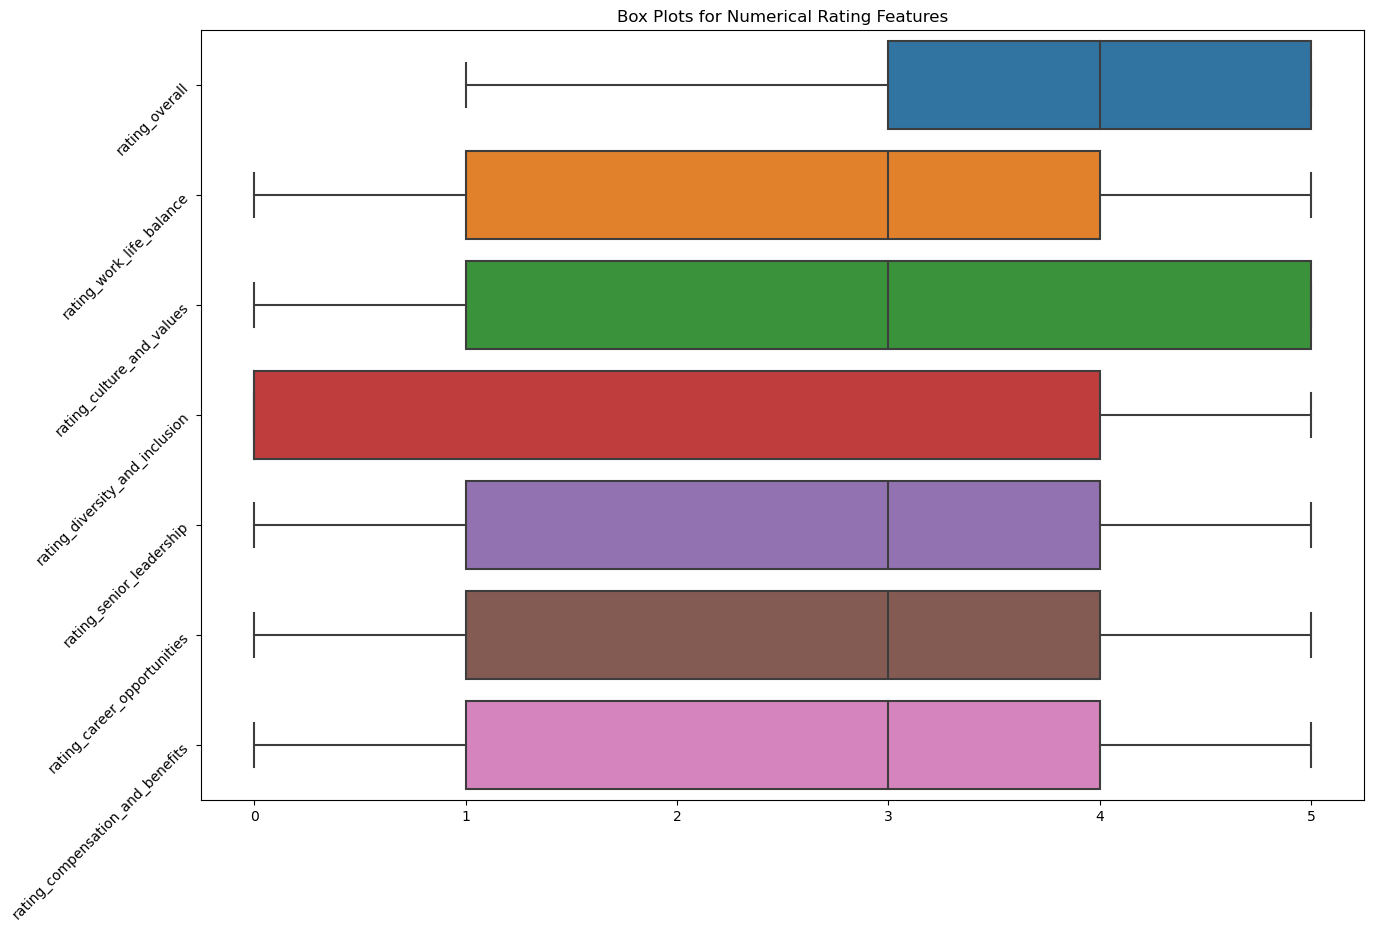

In [48]:
# Dynamically select numerical columns with "rating" in their name
rating_cols = [col for col in reviews.columns if "rating" in col and is_numeric_column(reviews[col])]
boxplot(rating_cols, "Box Plots for Numerical Rating Features")

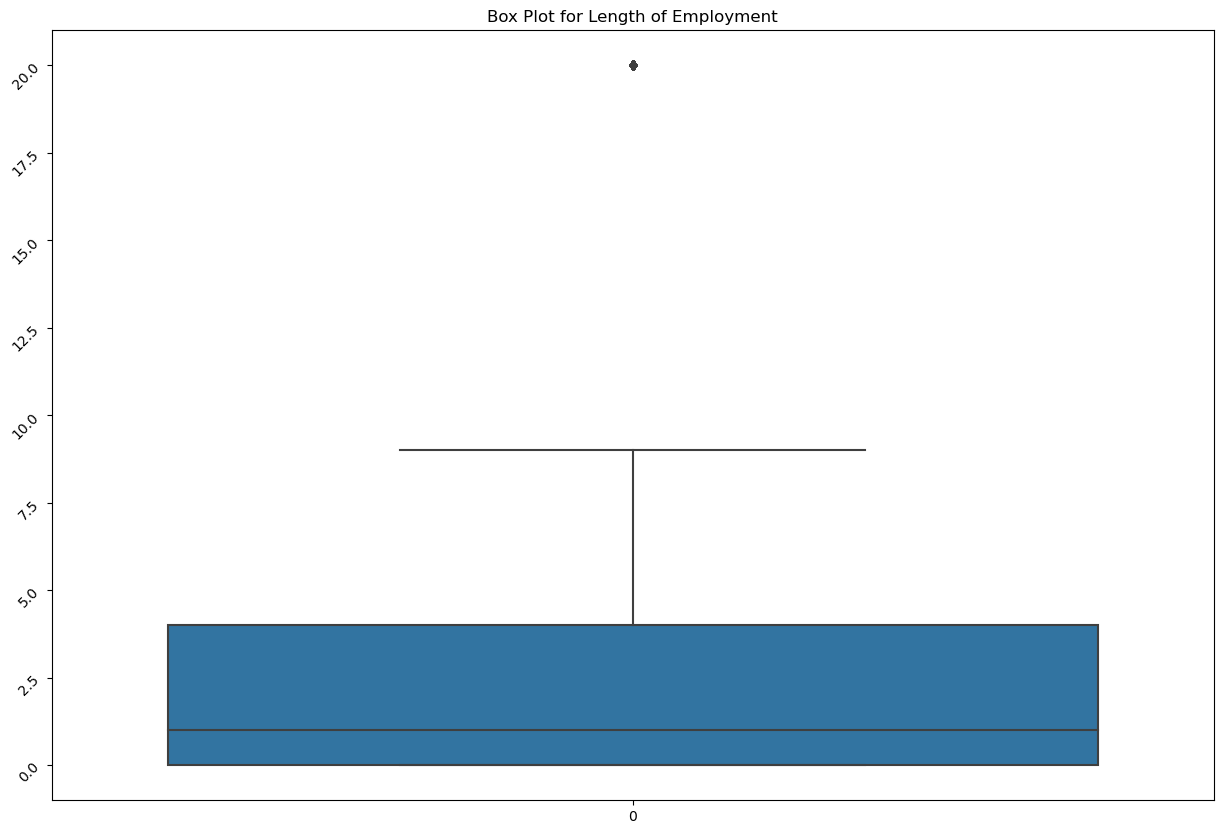

In [49]:
boxplot("length_of_employment", "Box Plot for Length of Employment", orient="v")

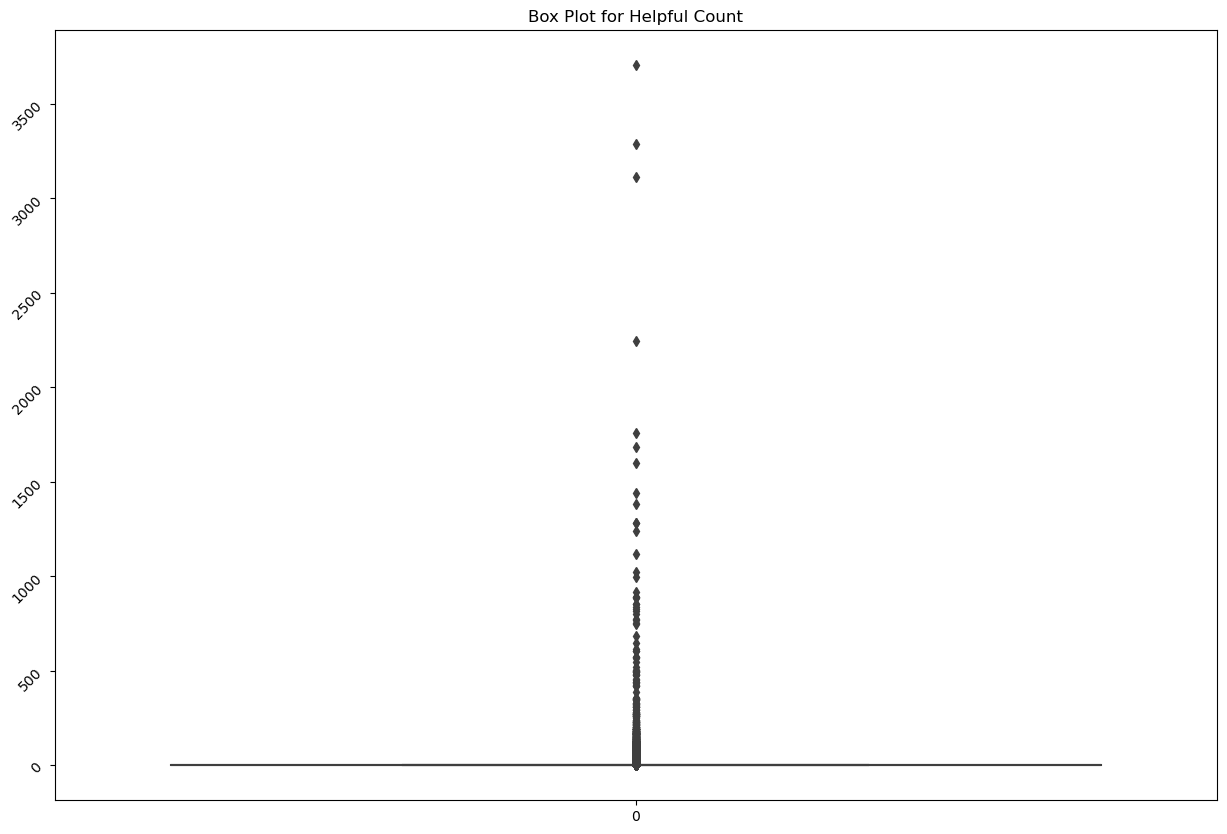

In [50]:
boxplot("count_helpful", "Box Plot for Helpful Count", orient="v")

## 3. Exploratory Data Analysis

### 3.1. Barplots

In [51]:
def barplot(df, x, title):
    plt.figure(figsize=(10,6))

    sns.countplot(data=df, x=x, order=df[x].value_counts().index)
    plt.title(title)

    plt.show()

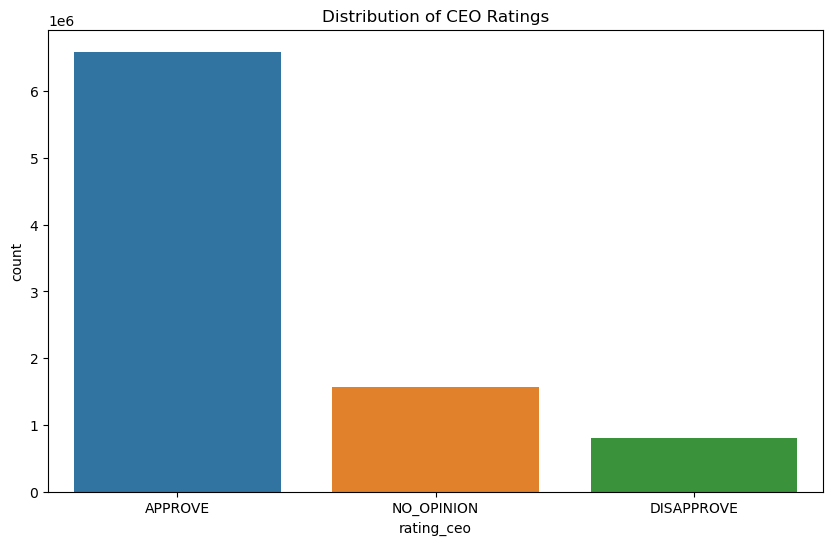

In [52]:
barplot(reviews, "rating_ceo", "Distribution of CEO Ratings")

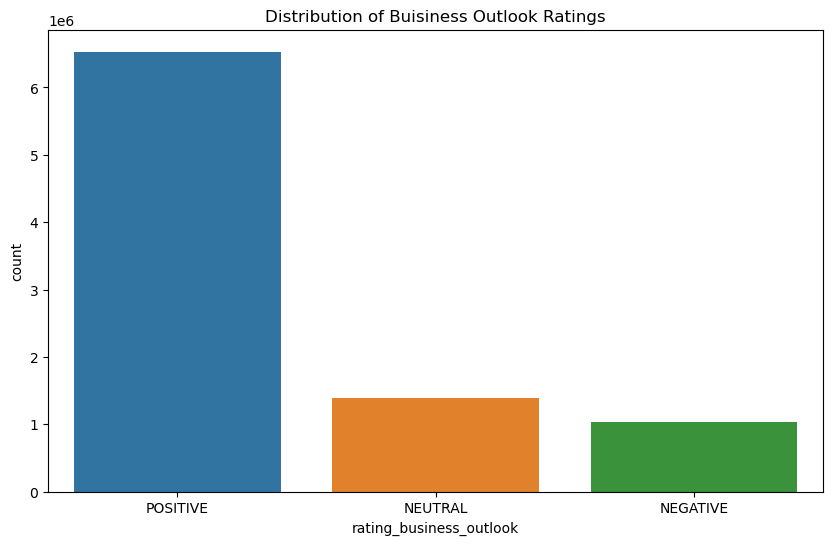

In [53]:
barplot(reviews, "rating_business_outlook", "Distribution of Buisiness Outlook Ratings")

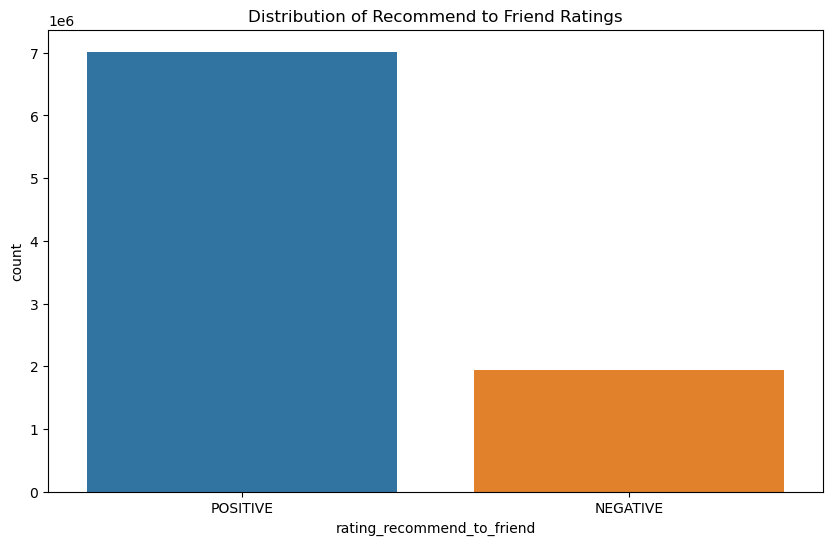

In [54]:
barplot(reviews, "rating_recommend_to_friend", "Distribution of Recommend to Friend Ratings")

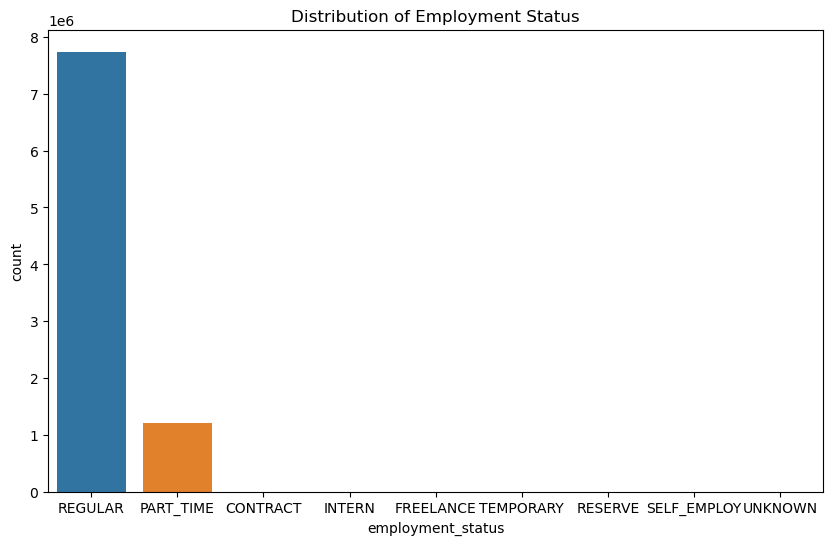

In [55]:
barplot(reviews, "employment_status", "Distribution of Employment Status")

In [56]:
reviews["employment_status"].value_counts()

REGULAR        7742515
PART_TIME      1210858
CONTRACT            63
INTERN              32
FREELANCE            9
TEMPORARY            4
RESERVE              1
SELF_EMPLOY          1
UNKNOWN              1
Name: employment_status, dtype: int64

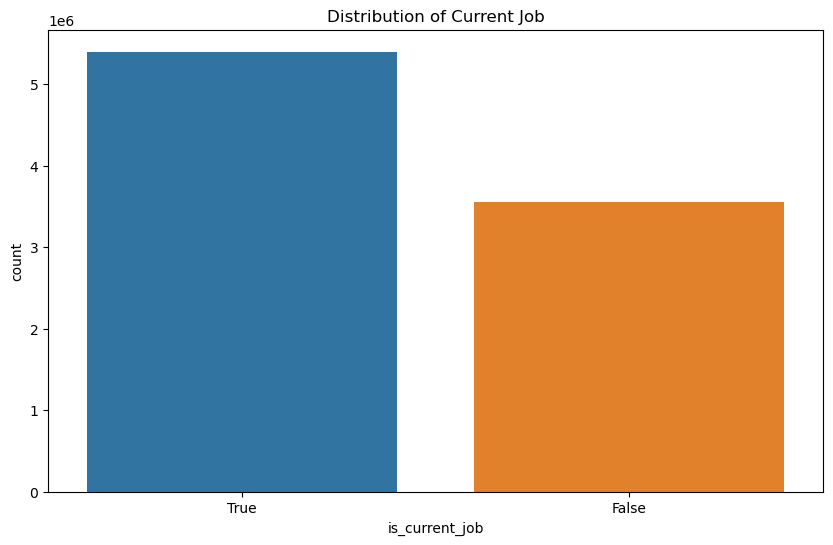

In [57]:
barplot(reviews, "is_current_job", "Distribution of Current Job")

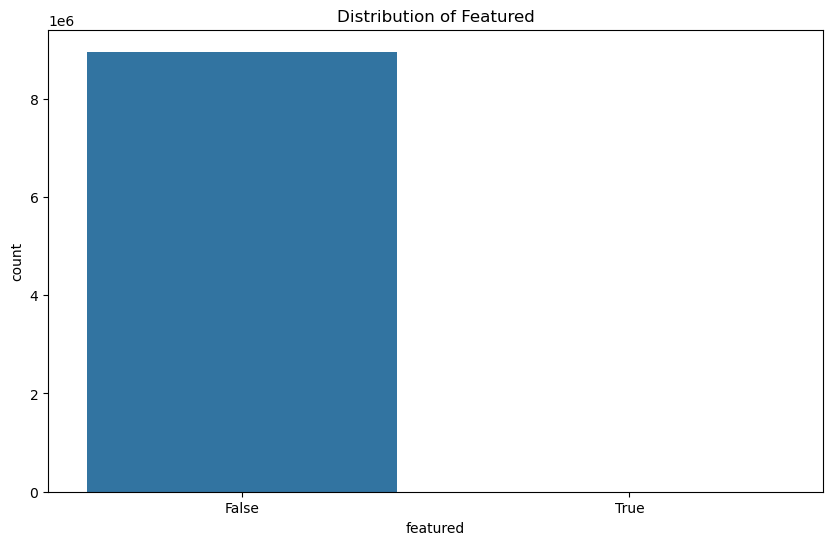

In [58]:
barplot(reviews, "featured", "Distribution of Featured")

In [59]:
reviews["featured"].value_counts()

False    8952148
True        1336
Name: featured, dtype: int64

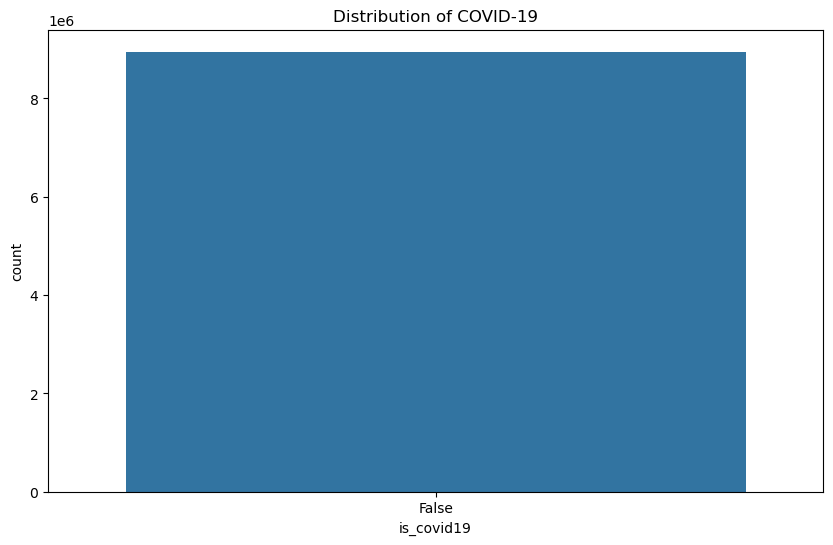

In [60]:
barplot(reviews, "is_covid19", "Distribution of COVID-19")

The last two columns offer no value in our data because of lack of variability and thus we will remove them.

In [61]:
to_drop = ["featured", "is_covid19"]
reviews.drop(labels=to_drop, axis=1, inplace=True)

reviews.shape[1]

21

### 3.2. Geographical Plot

In [62]:
import folium
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster

file_path = os.path.join("..", "data", "extracted", "locations_coordinates.csv")
col_names = ["location", "lat", "lon", "count"]

data = pd.read_csv(file_path, header=None, names=col_names)

In [63]:
# HeatMap
m = folium.Map(location=[data["lat"].mean(), data["lon"].mean()], zoom_start=10)

# Convert DataFrame into a list for the heatmap
heat_data = [[row["lat"], row["lon"], row["count"]] for index, row in data.iterrows()]

# Add heatmap
HeatMap(heat_data).add_to(m)

m.save("../results/maps/heat-map.html")

In [64]:
m

In [65]:
# MarkerMap
m = folium.Map(location=[data["lat"].mean(), data["lon"].mean()], zoom_start=10)

FastMarkerCluster(data=list(zip(data["lat"].values, data["lon"].values))).add_to(m)

m.save("../results/maps/marker-map.html")

In [66]:
m

### 3.3. Correlation Heatmap

In [67]:
# Compute the correlation matrix
corr = reviews.drop(columns=["is_current_job", "company_id"]) \
                .corr(numeric_only=True)

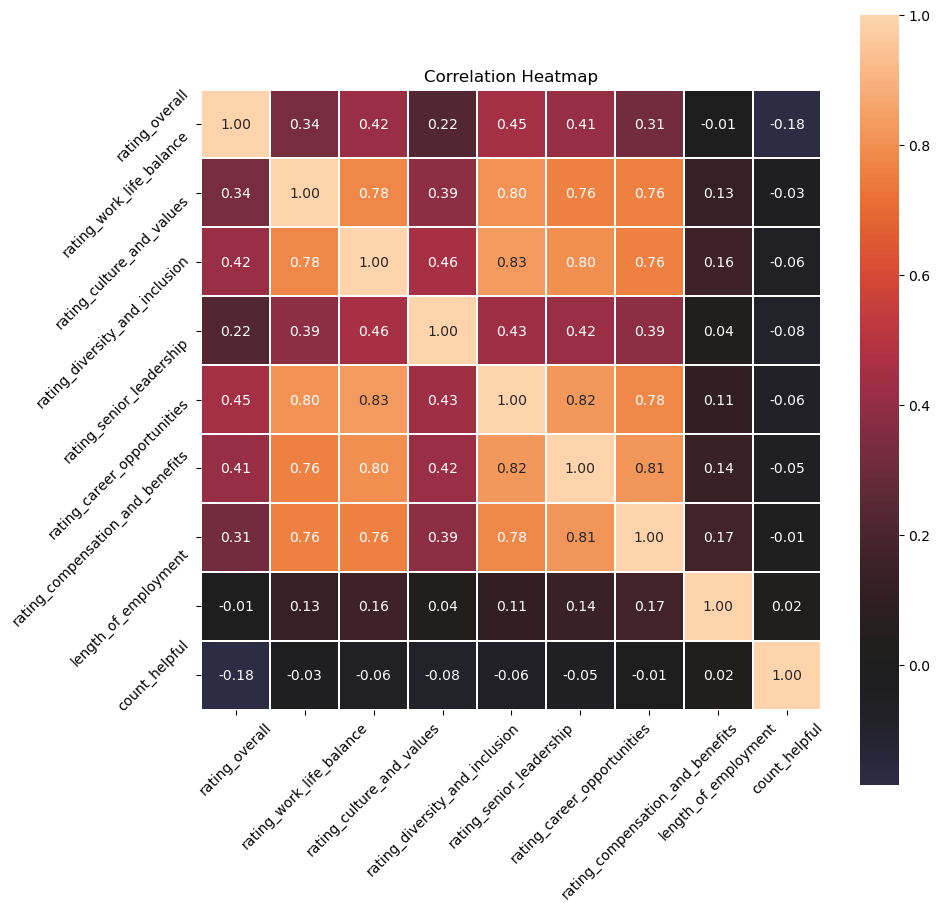

In [68]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Draw the heatmap
sns.heatmap(
    corr, 
    center=0, 
    square=True, 
    annot=True,
    fmt=".2f",
    linewidths=0.2
)

# Rotate x-axis labels
plt.title("Correlation Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=45)

# Show the plot
plt.show()

### 3.4. Correlation Boxplot

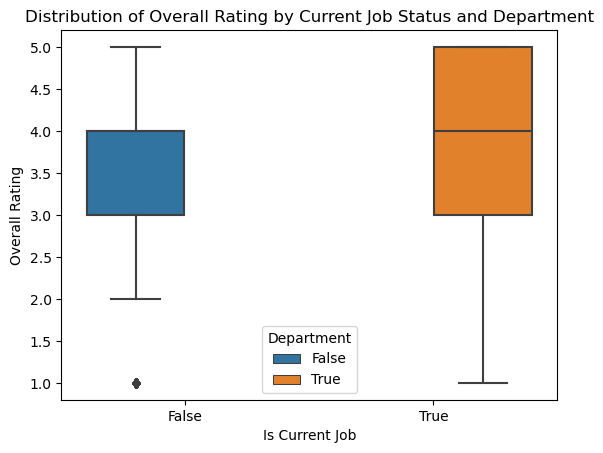

In [69]:
# Create a box plot with hue
sns.boxplot(data=reviews, x='is_current_job', y='rating_overall', hue='is_current_job')

plt.title('Distribution of Overall Rating by Current Job Status and Department')
plt.xlabel('Is Current Job')
plt.ylabel('Overall Rating')
plt.legend(title='Department')
plt.show()

### 4. Save the Preprocessed Dataframe

In [70]:
reviews.to_csv("../data/reviews.csv")